In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dt = pd.read_excel('/content/base_de_dados_estatica_final.xlsx', index_col=0) #para o nome do país ficar como índice

In [2]:
dt.head()
dt.info()
dt.columns

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Aruba to Zimbabwe
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   %_da_população_total_vivendo_em_cidades    168 non-null    float64
 1   qtd_cidades_pop_maior_17M                  168 non-null    int64  
 2   densidade_media_cidades_pop_maior_17M      168 non-null    float64
 3   qtd_cidades_pop_entre_17M_13M              168 non-null    int64  
 4   densidade_media_cidades_pop_entre_17M_13M  168 non-null    float64
 5   qtd_cidades_pop_entre_13M_9M_AT            168 non-null    int64  
 6   densidade_media_cidades_pop_entre_13M_9M   168 non-null    float64
 7   qtd_cidades_pop_entre_9M_1M                168 non-null    int64  
 8   densidade_media_cidades_pop_entre_9M_1M    168 non-null    float64
 9   qtd_cidades_pop_entre_1M_500k              168 non-null    int64  
 10  densidade_media_cidade

Index(['%_da_população_total_vivendo_em_cidades', 'qtd_cidades_pop_maior_17M',
       'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 'IDH_discretizado',
       'PIB_per_capita'],
      dtype='object')

In [4]:
from sklearn.preprocessing import MinMaxScaler
dtt = dt[['%_da_população_total_vivendo_em_cidades',
       'qtd_cidades_pop_maior_17M', 'densidade_media_cidades_pop_maior_17M',
       'qtd_cidades_pop_entre_17M_13M',
       'densidade_media_cidades_pop_entre_17M_13M',
       'qtd_cidades_pop_entre_13M_9M_AT',
       'densidade_media_cidades_pop_entre_13M_9M',
       'qtd_cidades_pop_entre_9M_1M',
       'densidade_media_cidades_pop_entre_9M_1M',
       'qtd_cidades_pop_entre_1M_500k',
       'densidade_media_cidades_pop_entre_1M_500K', 
       'IDH_discretizado',
       'PIB_per_capita']] #13
scaler = MinMaxScaler()
print(scaler.fit(dtt))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(dtt))
# print(scaler.inverse_transform(dtt))

MinMaxScaler(copy=True, feature_range=(0, 1))
[1.00000000e+02 3.00000000e+00 1.70070580e+01 1.00000000e+00
 3.38780000e+01 2.00000000e+00 1.62400000e+01 8.30000000e+01
 2.53270000e+01 1.59000000e+02 2.48260000e+01 3.00000000e+00
 1.17369541e+05]
[[0.34923343 0.         0.         ... 0.         1.         0.25720918]
 [0.14413833 0.         0.         ... 0.42139289 0.         0.00385682]
 [0.61010951 0.         0.         ... 0.20788959 0.33333333 0.02846184]
 ...
 [0.6179366  0.         0.         ... 0.10902878 0.66666667 0.05346344]
 [0.35529683 0.         0.         ... 0.1885458  0.33333333 0.01255878]
 [0.21855908 0.         0.         ... 0.09417546 0.33333333 0.01350891]]


In [5]:
from sklearn.cluster import KMeans
X = scaler.transform(dtt)
X.shape

(168, 13)

Text(0, 0.5, 'Variações')

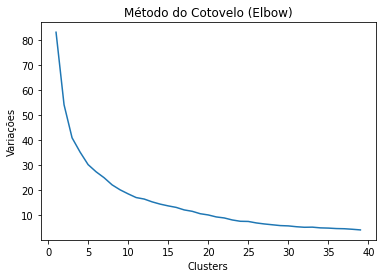

In [6]:
variacoes = []
for i in range (1,40):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)
plt.plot(range(1,40),variacoes)
plt.title('Método do Cotovelo (Elbow)') 
plt.xlabel ('Clusters') 
plt.ylabel ('Variações')

In [7]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
cluster_pred = kmeans_final.predict(X)
cluster_centro = kmeans_final.cluster_centers_
#cluster_centro

In [9]:
#dtt[kmeans_final.labels_==0].sum

In [ ]:
#dtt[kmeans_final.labels_==1].sum


In [ ]:
#dtt[kmeans_final.labels_==2].sum


In [ ]:
#dtt[kmeans_final.labels_==3].sum

In [ ]:
#dtt[kmeans_final.labels_==4].sum


In [ ]:
#dtt[kmeans_final.labels_==5].sum

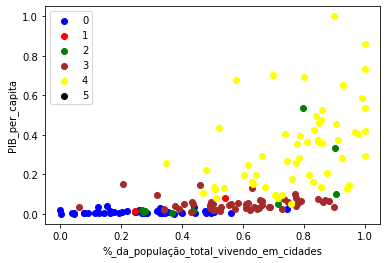

In [19]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,12],c='green',label='2')
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,12],c='brown', label='3')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,12],c='yellow', label='4')
plt.scatter(X[cluster_pred==5,0],X[cluster_pred==5,12],c='black',label='5')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)

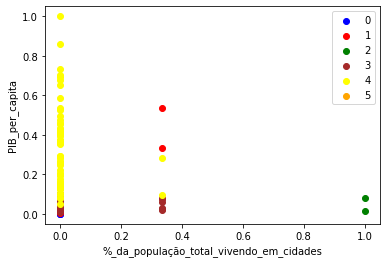

In [ ]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[cluster_pred==0,1],X[cluster_pred==0,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,1],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==2,1],X[cluster_pred==2,12],c='green', label='2')
plt.scatter(X[cluster_pred==4,1],X[cluster_pred==4,12],c='brown',label='3')
plt.scatter(X[cluster_pred==1,1],X[cluster_pred==1,12],c='yellow', label='4')
plt.scatter(X[cluster_pred==5,1],X[cluster_pred==5,12],c='orange',label='5')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)

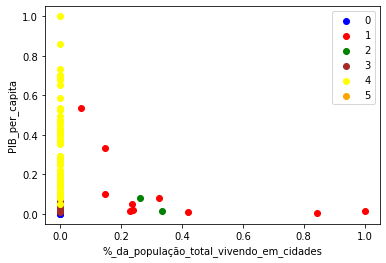

In [ ]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[cluster_pred==0,4],X[cluster_pred==0,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,4],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==2,4],X[cluster_pred==2,12],c='green', label='2')
plt.scatter(X[cluster_pred==4,4],X[cluster_pred==4,12],c='brown',label='3')
plt.scatter(X[cluster_pred==1,4],X[cluster_pred==1,12],c='yellow', label='4')
plt.scatter(X[cluster_pred==5,4],X[cluster_pred==5,12],c='orange',label='5')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)

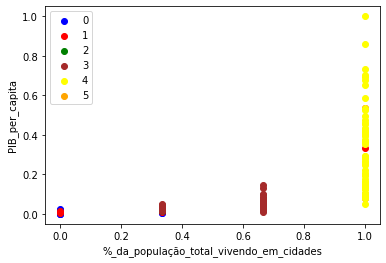

In [ ]:
#%_da_população_total_vivendo_em_cidades x PIB_per_capita
plt.scatter(X[cluster_pred==0,11],X[cluster_pred==0,12],c='blue', label='0')
plt.scatter(X[cluster_pred==3,11],X[cluster_pred==3,12],c='red',label='1')
plt.scatter(X[cluster_pred==2,11],X[cluster_pred==2,12],c='green', label='2')
plt.scatter(X[cluster_pred==4,11],X[cluster_pred==4,12],c='brown',label='3')
plt.scatter(X[cluster_pred==1,11],X[cluster_pred==1,12],c='yellow', label='4')
plt.scatter(X[cluster_pred==5,11],X[cluster_pred==5,12],c='orange',label='5')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)

DBSCAN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
dt = scaler.fit_transform(dt)

dbscan = DBSCAN(eps=1, min_samples=2) #eps : a distância que especifica as vizinhanças. Dois pontos são considerados vizinhos se a distância entre eles for menor ou igual a eps.
dbscan.fit(dt)
previsoes = dbscan.labels_
previsoes

array([ 0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1, -1,  0,  0,
        0,  0,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1, -1,
       -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  3,  0,  3,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0,  0, -1,  1,  0,  0,  0, -1,  0,  0, -1,  1, -1,  0,  0])

In [ ]:
previsoes[previsoes == -1].size

39

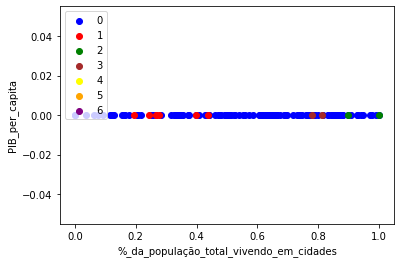

In [ ]:
plt.scatter(X[previsoes==0,0],X[previsoes==0,2],c='blue', label='0')
plt.scatter(X[previsoes==1,0],X[previsoes==1,2],c='red',label='1')
plt.scatter(X[previsoes==2,0],X[previsoes==2,2],c='green', label='2')
plt.scatter(X[previsoes==3,0],X[previsoes==3,2],c='brown',label='3')
plt.scatter(X[previsoes==4,0],X[previsoes==4,2],c='yellow', label='4')
plt.scatter(X[previsoes==5,0],X[previsoes==5,2],c='orange',label='5')
plt.scatter(X[previsoes==6,0],X[previsoes==6,2],c='purple',label='6')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

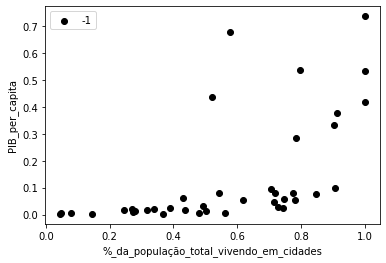

In [ ]:
plt.scatter(X[previsoes==-1,0],X[previsoes==-1,12],c='black',label='-1')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

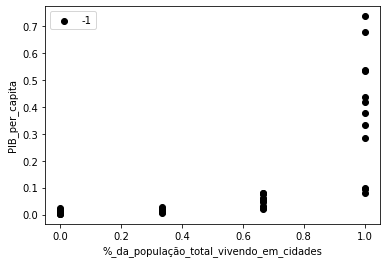

In [ ]:
plt.scatter(X[previsoes==-1,11],X[previsoes==-1,12],c='black',label='-1')
plt.xlabel ('%_da_população_total_vivendo_em_cidades') 
plt.ylabel ('PIB_per_capita')
plt.legend()

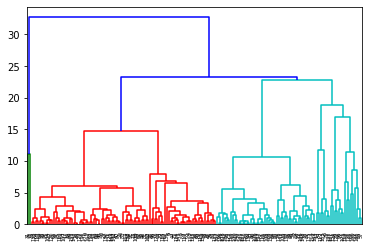

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

scaler=StandardScaler()
dt = scaler.fit_transform(dt)

dendograma = dendrogram(linkage(dt,method='ward'))

**ANÁLISE DE SILHUETA** A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
#X, y = dt

In [ ]:
kmeans_model = KMeans(n_clusters=25, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.2918343970773319

**Índice Calinski-Harabasz**
A pontuação é maior quando os clusters são densos e bem separados, o que se relaciona com um conceito padrão de um cluster.



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=25, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(X, labels)


62.793261285893664

**Índice Davies-Bouldin** Values closer to zero indicate a better partition.


In [ ]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=25, random_state=1).fit(X)
labels = kmeans.labels_
davies_bouldin_score(X, labels)

0.7757385545348708